# Stock Sterling Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'AMD' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def sterling_ratio(stocks_returns, market_returns):
    mrk_rate_ret = (market_returns[-1] - market_returns[0])/ market_returns[0]
    m = np.matrix([stocks_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    er = rf + beta*(mrk_rate_ret-rf)
    average_dd = 1.0 - (stocks_returns / np.maximum.accumulate(stocks_returns)).mean()
    sterling_r = (er - rf) / average_dd
    return sterling_r

Text(0, 0.5, 'Sterling Ratio')

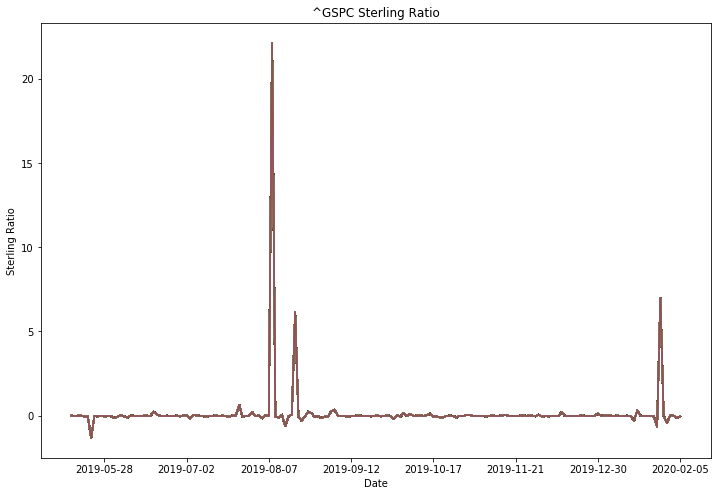

In [7]:
# Compute the running Sterling Ratio
running = [sterling_ratio(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Sterling Ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol1 + ' Sterling Ratio')
plt.xlabel('Date')
plt.ylabel('Sterling Ratio')

In [8]:
SR = sterling_ratio(stocks_returns, market_returns)
SR

Date
2019-01-03   -0.039507
2019-01-04   -0.039501
2019-01-07   -0.039499
2019-01-08   -0.039499
2019-01-09   -0.039499
2019-01-10   -0.039501
2019-01-11   -0.039504
2019-01-14   -0.039496
2019-01-15   -0.039504
2019-01-16   -0.039501
2019-01-17   -0.039504
2019-01-18   -0.039499
2019-01-22   -0.039501
2019-01-23   -0.039499
2019-01-24   -0.039507
2019-01-25   -0.039496
2019-01-28   -0.039501
2019-01-29   -0.039499
2019-01-30   -0.039504
2019-01-31   -0.039499
2019-02-01   -0.039501
2019-02-04   -0.039501
2019-02-05   -0.039499
2019-02-06   -0.039504
2019-02-07   -0.039499
2019-02-08   -0.039504
2019-02-11   -0.039496
2019-02-12   -0.039504
2019-02-13   -0.039499
2019-02-14   -0.039504
                ...   
2020-05-19   -0.039499
2020-05-20   -0.039499
2020-05-21   -0.039501
2020-05-22   -0.039496
2020-05-26   -0.039501
2020-05-27   -0.039496
2020-05-28   -0.039499
2020-05-29   -0.039499
2020-06-01   -0.039501
2020-06-02   -0.039499
2020-06-03   -0.039499
2020-06-04   -0.039499
2020-0

Text(0, 0.5, 'Sterling Ratio')

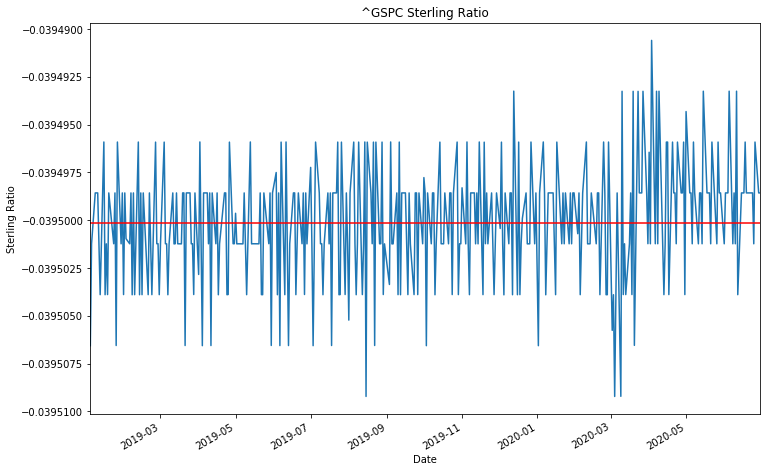

In [9]:
SR.plot(figsize=(12,8), title = symbol1 + ' Sterling Ratio')
plt.axhline(y=SR.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sterling Ratio')